# Preprocessing steps that are made outside of the pipeline

1. Air and Dew-point temperatures missing values imputed from a different dataset becaues it is done pre dropping NA's
2. Dropping NA in the rest of the data
3. Fixing 2x target variable outliers

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
#loading initial dataframe
df = pd.read_csv('../datasets/initial_dataframe.csv', delimiter=',')
df['datetime_converted'] = pd.to_datetime(df['datetime_converted'], utc=True)
df = df.set_index(pd.DatetimeIndex(df['datetime_converted'],dayfirst=True))
df = df.drop(columns='datetime_converted')

In [22]:
#let's upload kaisaniemi data
df_kaisaniemi1 = pd.read_csv('../datasets/kaisaniemi_17_18.csv')
df_kaisaniemi2 = pd.read_csv('../datasets/kaisaniemi_18_19.csv')
df_kaisaniemi = pd.concat([df_kaisaniemi1,df_kaisaniemi2],axis=0)

In [23]:
df_kaisaniemi['datetime'] = df_kaisaniemi['Year'].astype(str)+'-'+df_kaisaniemi['m'].astype(str)+'-'+df_kaisaniemi['d'].astype(str)+' '+ df_kaisaniemi['Time'].astype(str)
df_kaisaniemi['datetime_converted'] = pd.to_datetime(df_kaisaniemi['datetime'], utc=True)
df_kaisaniemi = df_kaisaniemi.set_index(pd.DatetimeIndex(df_kaisaniemi['datetime_converted'],dayfirst=True))
df_kaisaniemi = df_kaisaniemi.drop(columns=['Year','m','d','Time','Time zone','datetime','datetime_converted'])
df_kaisaniemi.columns = ['Air temperature (degC)','Dew-point temperature (degC)']
df_kaisaniemi = df_kaisaniemi.drop_duplicates()

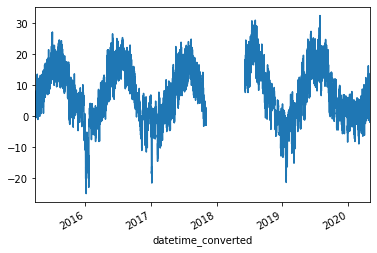

In [24]:
df['Air temperature (degC)'].plot()

In [25]:
df.update(df_kaisaniemi['Air temperature (degC)'], overwrite=False)
df.update(df_kaisaniemi['Dew-point temperature (degC)'], overwrite=False)

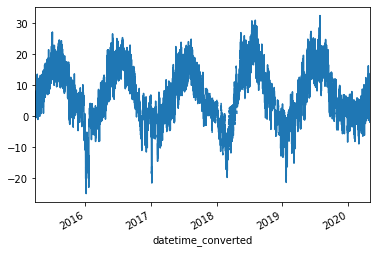

In [26]:
df['Air temperature (degC)'].plot()

In [27]:
df.isnull().mean()*100

Cloud amount (1/8)                0.192881
Pressure (msl) (hPa)              0.145782
Relative humidity (%)             0.145782
Precipitation intensity (mm/h)    0.358849
Snow depth (cm)                   1.552022
Air temperature (degC)            3.088344
Dew-point temperature (degC)      0.888151
Horizontal visibility (m)         2.202436
Wind direction (deg)              0.614529
Gust speed (m/s)                  0.596586
Wind speed (m/s)                  0.614529
Value (kWh)                       1.525108
Global radiation (W/m2)           0.076255
dtype: float64

In [28]:
df = df.dropna()

In [29]:
df.isnull().mean()*100

Cloud amount (1/8)                0.0
Pressure (msl) (hPa)              0.0
Relative humidity (%)             0.0
Precipitation intensity (mm/h)    0.0
Snow depth (cm)                   0.0
Air temperature (degC)            0.0
Dew-point temperature (degC)      0.0
Horizontal visibility (m)         0.0
Wind direction (deg)              0.0
Gust speed (m/s)                  0.0
Wind speed (m/s)                  0.0
Value (kWh)                       0.0
Global radiation (W/m2)           0.0
dtype: float64

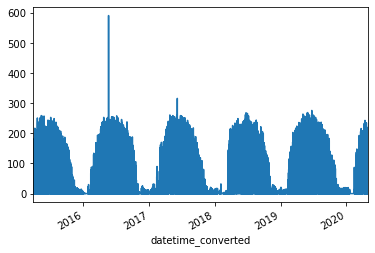

In [30]:
df['Value (kWh)'].plot()

In [31]:
slice_1 = '2016-05-22 03:00:00+00:00'
slice_2 = '2016-05-22 12:00:00+00:00'

df['Value (kWh)'][(df['Value (kWh)'].index>=slice_1)&(df['Value (kWh)'].index<=slice_2)].sort_index()

datetime_converted
2016-05-22 03:00:00+00:00     21.0
2016-05-22 04:00:00+00:00     36.0
2016-05-22 05:00:00+00:00     58.0
2016-05-22 06:00:00+00:00    105.0
2016-05-22 07:00:00+00:00    137.0
2016-05-22 08:00:00+00:00    591.0
2016-05-22 09:00:00+00:00    226.0
2016-05-22 10:00:00+00:00    237.0
2016-05-22 11:00:00+00:00    240.0
2016-05-22 12:00:00+00:00    231.0
Name: Value (kWh), dtype: float64

In [32]:
slice_1 = '2016-05-22 07:00:00+00:00'
slice_2 = '2016-05-22 09:00:00+00:00'
(df['Value (kWh)'][df['Value (kWh)'].index==slice_1].values+df['Value (kWh)'][df['Value (kWh)'].index==slice_2].values)/2

array([181.5])

In [33]:
index_val = '2016-05-22 08:00:00+00:00'
df['Value (kWh)'].loc[index_val] = 181.5

In [34]:
val_index = '2017-06-07 15:00:00+00:00'
df['Value (kWh)'].loc[val_index] = 114

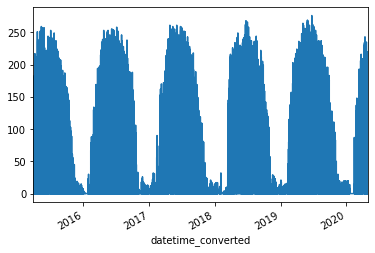

In [35]:
df['Value (kWh)'].plot()

In [40]:
df = df.drop(columns=['Snow depth (cm)','Horizontal visibility (m)'])

In [41]:
#taking snow depth and horizontal visibility out straight, they are not a part of the forecast API data call
cols=['CloudAmount', 
      'Pressure_msl_hpa', 
      'RelativeHumidity_percent',
       'PrecipitationIntensity_mm_h', 
       'AirTemperature_degC', 
      'DewPointTemperature_degC',
      'WindDirection', 
      'GustSpeed_m_s',
       'WindSpeed_m_s', 
      'Energy_kWh', 
      'GlobalRadiation_W_m2'
]

In [42]:
df.columns = cols

In [43]:
df.columns

Index(['CloudAmount', 'Pressure_msl_hpa', 'RelativeHumidity_percent',
       'PrecipitationIntensity_mm_h', 'AirTemperature_degC',
       'DewPointTemperature_degC', 'WindDirection', 'GustSpeed_m_s',
       'WindSpeed_m_s', 'Energy_kWh', 'GlobalRadiation_W_m2'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df, df['Energy_kWh'], test_size = 0.2, random_state=42)

In [18]:
# df.to_csv('../datasets/pipeline_df.csv')

In [45]:
X_train.to_csv('../datasets/train.csv')
X_test.to_csv('../datasets/test.csv')